Readme:
This file contains code that was used to dichotomise continuous variables (age, number of children, revenues, credit ranges) and replace them in the models. This attempt brought no improvement, so these experiments were not kept for the final submission.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df_record = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA prepared.csv", low_memory = False)

In [4]:
pd.crosstab(df_record.fin_missing, df_record.roadside_missing)

roadside_missing,0,1
fin_missing,,
0,8318,1482
1,3172,583


In [5]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA hh.csv")

In [6]:
[i for i in df.columns]

['household_key',
 'individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribe

In [7]:
df = df.assign(age_bins = pd.cut(x=df.age_2018, bins=[0, 35, 45, 55, 65, 75, 85, 95, 115]))

In [8]:
pd.crosstab(df.age_bins, df.fsv_any)

fsv_any,0,1
age_bins,,
"(0, 35]",14,3
"(35, 45]",52,23
"(45, 55]",231,110
"(55, 65]",398,175
"(65, 75]",926,326
"(75, 85]",674,181
"(85, 95]",357,65
"(95, 115]",23,4


In [9]:
pd.crosstab(df.age_bins, df.ins_client_flag_y)

ins_client_flag_y,0,1
age_bins,,
"(0, 35]",11,6
"(35, 45]",39,36
"(45, 55]",227,114
"(55, 65]",384,189
"(65, 75]",931,321
"(75, 85]",628,227
"(85, 95]",306,116
"(95, 115]",26,1


In [10]:
pd.crosstab(df.age_bins, df['trv_globalware_flag_y'])

trv_globalware_flag_y,0,1
age_bins,,
"(0, 35]",16,1
"(35, 45]",63,12
"(45, 55]",272,69
"(55, 65]",455,118
"(65, 75]",1004,248
"(75, 85]",708,147
"(85, 95]",387,35
"(95, 115]",25,2


In [11]:
pd.crosstab(df.aaa_before_club_dummy, df.fsv_any)

fsv_any,0,1
aaa_before_club_dummy,,
0,2485,806
1,190,81


In [12]:
target = ['fsv_any', 'ins_client_flag_y', 'trv_globalware_flag_y']

In [13]:
colnames = list(df.columns[4:])
vars_to_remove = [
    'member_primary',
    'fsv_cmsi_flag_y',
     'fsv_credit_card_flag_y',
     'fsv_deposit_program_flag_y',
     'fsv_home_equity_flag_y',
     'fsv_id_theft_flag_y',
     'fsv_mortgage_flag_y',
    'ins_client_flag_y',
    'trv_globalware_flag_y',
    'age_2018',
    'cost_2019',
     'cost_2018',
    'age_2018_primary',
    'join_club_year',
 'cost_2018_per_member',
 'cost_2019_per_member',
 'calls_2018_per_member',
 'calls_2019_per_member',
 'cost_2018_log',
 'cost_2019_log',
 'cost_2018_per_member_log',
 'cost_2019_per_member_log',
 'children_num_std',
 'credit_ranges_num_std',
 'income_mid_std',
 'primary_credit_ranges_num_std',
 'primary_income_mid_std',
 'active_2019_std',
 'active_2018_std',
 'age_2018_std',
 'new_member_std',
 'member_out_std',
 'cost_2019_std',
 'cost_2018_std',
 'calls_2019_std',
 'calls_2018_std',
 'age_2018_primary_std',
 'join_club_year_std',
 'cost_2018_per_member_std',
 'cost_2019_per_member_std',
 'calls_2018_per_member_std',
 'calls_2019_per_member_std',
 'cost_2018_per_member_log_std',
 'cost_2019_per_member_log_std',
 'cost_2018_log_std',
 'cost_2019_log_std'
]
for i in vars_to_remove:
    colnames.remove(i)
colnames

['aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_status_unsubscribed',
 'email_status_nan',
 'gender_grouped_male',
 'gender_grouped_nan',
 'home_owner_gro

In [14]:
for i in colnames:
    for j in target:
        print(i)
        print(j, ":")
        print("")
        print(pd.crosstab(df[i], df[j]))
        print("")
        print("")

aaa_before_club_dummy
fsv_any :

fsv_any                   0    1
aaa_before_club_dummy           
0                      2485  806
1                       190   81


aaa_before_club_dummy
ins_client_flag_y :

ins_client_flag_y         0    1
aaa_before_club_dummy           
0                      2359  932
1                       193   78


aaa_before_club_dummy
trv_globalware_flag_y :

trv_globalware_flag_y     0    1
aaa_before_club_dummy           
0                      2713  578
1                       217   54


fin_missing
fsv_any :

fsv_any         0    1
fin_missing           
0            2175  786
1             500  101


fin_missing
ins_client_flag_y :

ins_client_flag_y     0    1
fin_missing                 
0                  2081  880
1                   471  130


fin_missing
trv_globalware_flag_y :

trv_globalware_flag_y     0    1
fin_missing                     
0                      2413  548
1                       517   84


children_num
fsv_any :

fsv_any     

fsv_any                 0    1
county_grouped_kent           
0                    2059  648
1                     616  239


county_grouped_kent
ins_client_flag_y :

ins_client_flag_y       0    1
county_grouped_kent           
0                    1929  778
1                     623  232


county_grouped_kent
trv_globalware_flag_y :

trv_globalware_flag_y     0    1
county_grouped_kent             
0                      2224  483
1                       706  149


county_grouped_newport
fsv_any :

fsv_any                    0    1
county_grouped_newport           
0                       2475  823
1                        200   64


county_grouped_newport
ins_client_flag_y :

ins_client_flag_y          0    1
county_grouped_newport           
0                       2360  938
1                        192   72


county_grouped_newport
trv_globalware_flag_y :

trv_globalware_flag_y      0    1
county_grouped_newport           
0                       2710  588
1                       


gender_grouped_male
ins_client_flag_y :

ins_client_flag_y       0    1
gender_grouped_male           
0                    1718  570
1                     834  440


gender_grouped_male
trv_globalware_flag_y :

trv_globalware_flag_y     0    1
gender_grouped_male             
0                      1928  360
1                      1002  272


gender_grouped_nan
fsv_any :

fsv_any                0    1
gender_grouped_nan           
0                   1624  654
1                   1051  233


gender_grouped_nan
ins_client_flag_y :

ins_client_flag_y      0    1
gender_grouped_nan           
0                   1565  713
1                    987  297


gender_grouped_nan
trv_globalware_flag_y :

trv_globalware_flag_y     0    1
gender_grouped_nan              
0                      1829  449
1                      1101  183


home_owner_grouped_renter
fsv_any :

fsv_any                       0    1
home_owner_grouped_renter           
0                          2580  858
1            

trv_globalware_flag_y              0    1
kcl_grouped_promising_families           
0                               2898  627
1                                 32    5


kcl_grouped_significant_singles
fsv_any :

fsv_any                             0    1
kcl_grouped_significant_singles           
0                                2632  874
1                                  43   13


kcl_grouped_significant_singles
ins_client_flag_y :

ins_client_flag_y                   0    1
kcl_grouped_significant_singles           
0                                2512  994
1                                  40   16


kcl_grouped_significant_singles
trv_globalware_flag_y :

trv_globalware_flag_y               0    1
kcl_grouped_significant_singles           
0                                2879  627
1                                  51    5


kcl_grouped_singles_and_starters
fsv_any :

fsv_any                              0    1
kcl_grouped_singles_and_starters           
0                      

fsv_any                                               0    1
mosaic_global_household_post_industrial_survivors           
0                                                  2560  843
1                                                   115   44


mosaic_global_household_post_industrial_survivors
ins_client_flag_y :

ins_client_flag_y                                     0    1
mosaic_global_household_post_industrial_survivors           
0                                                  2450  953
1                                                   102   57


mosaic_global_household_post_industrial_survivors
trv_globalware_flag_y :

trv_globalware_flag_y                                 0    1
mosaic_global_household_post_industrial_survivors           
0                                                  2792  611
1                                                   138   21


mosaic_global_household_routine_service_workers
fsv_any :

fsv_any                                             0    

fsv_any                                         0    1
occupation_group_grouped_management_-_known           
0                                            2511  804
1                                             164   83


occupation_group_grouped_management_-_known
ins_client_flag_y :

ins_client_flag_y                               0    1
occupation_group_grouped_management_-_known           
0                                            2388  927
1                                             164   83


occupation_group_grouped_management_-_known
trv_globalware_flag_y :

trv_globalware_flag_y                           0    1
occupation_group_grouped_management_-_known           
0                                            2762  553
1                                             168   79


occupation_group_grouped_office_administration_-_inferred
fsv_any :

fsv_any                                                0    1
occupation_group_grouped_office_administration_...           
0      

ins_client_flag_y                      0    1
occupation_group_grouped_technical           
0                                   2496  971
1                                     56   39


occupation_group_grouped_technical
trv_globalware_flag_y :

trv_globalware_flag_y                  0    1
occupation_group_grouped_technical           
0                                   2862  605
1                                     68   27


occupation_group_grouped_nan
fsv_any :

fsv_any                          0    1
occupation_group_grouped_nan           
0                             1626  654
1                             1049  233


occupation_group_grouped_nan
ins_client_flag_y :

ins_client_flag_y                0    1
occupation_group_grouped_nan           
0                             1567  713
1                              985  297


occupation_group_grouped_nan
trv_globalware_flag_y :

trv_globalware_flag_y            0    1
occupation_group_grouped_nan           
0                   

fsv_any                                     0    1
race_grouped_hispanic_-_hispanic_origin           
0                                        2602  855
1                                          73   32


race_grouped_hispanic_-_hispanic_origin
ins_client_flag_y :

ins_client_flag_y                           0    1
race_grouped_hispanic_-_hispanic_origin           
0                                        2487  970
1                                          65   40


race_grouped_hispanic_-_hispanic_origin
trv_globalware_flag_y :

trv_globalware_flag_y                       0    1
race_grouped_hispanic_-_hispanic_origin           
0                                        2846  611
1                                          84   21


race_grouped_hispanic_-_portuguese_origin
fsv_any :

fsv_any                                       0    1
race_grouped_hispanic_-_portuguese_origin           
0                                          2621  856
1                                           

1.0                     662  148


primary_credit_ranges_num
fsv_any :

fsv_any                      0    1
primary_credit_ranges_num          
0.0                        726  184
1.0                         20    8
2.0                         34    9
3.0                        134   53
4.0                        315  112
5.0                        436  145
6.0                        698  271
7.0                        312  105


primary_credit_ranges_num
ins_client_flag_y :

ins_client_flag_y            0    1
primary_credit_ranges_num          
0.0                        691  219
1.0                         17   11
2.0                         27   16
3.0                        127   60
4.0                        291  136
5.0                        410  171
6.0                        672  297
7.0                        317  100


primary_credit_ranges_num
trv_globalware_flag_y :

trv_globalware_flag_y        0    1
primary_credit_ranges_num          
0.0                        766  14

fsv_any                                      0    1
primary_kcl_grouped_cultural_connections           
0.0                                       2660  881
1.0                                         15    6


primary_kcl_grouped_cultural_connections
ins_client_flag_y :

ins_client_flag_y                            0     1
primary_kcl_grouped_cultural_connections            
0.0                                       2539  1002
1.0                                         13     8


primary_kcl_grouped_cultural_connections
trv_globalware_flag_y :

trv_globalware_flag_y                        0    1
primary_kcl_grouped_cultural_connections           
0.0                                       2912  629
1.0                                         18    3


primary_kcl_grouped_economic_challenges
fsv_any :

fsv_any                                     0    1
primary_kcl_grouped_economic_challenges           
0.0                                      2662  884
1.0                               

fsv_any                            0    1
primary_language_grouped_other           
0.0                             2623  871
1.0                               52   16


primary_language_grouped_other
ins_client_flag_y :

ins_client_flag_y                  0    1
primary_language_grouped_other           
0.0                             2505  989
1.0                               47   21


primary_language_grouped_other
trv_globalware_flag_y :

trv_globalware_flag_y              0    1
primary_language_grouped_other           
0.0                             2871  623
1.0                               59    9


primary_language_grouped_unknown
fsv_any :

fsv_any                              0    1
primary_language_grouped_unknown           
0.0                               2551  852
1.0                                124   35


primary_language_grouped_unknown
ins_client_flag_y :

ins_client_flag_y                    0    1
primary_language_grouped_unknown           
0.0               

trv_globalware_flag_y                                 0    1
primary_mosaic_global_household_rural_inheritance           
0.0                                                2929  632
1.0                                                   1    0


primary_mosaic_global_household_sophisticated_singles
fsv_any :

fsv_any                                                0    1
primary_mosaic_global_household_sophisticated_s...           
0.0                                                 2649  881
1.0                                                   26    6


primary_mosaic_global_household_sophisticated_singles
ins_client_flag_y :

ins_client_flag_y                                      0     1
primary_mosaic_global_household_sophisticated_s...            
0.0                                                 2530  1000
1.0                                                   22    10


primary_mosaic_global_household_sophisticated_singles
trv_globalware_flag_y :

trv_globalware_flag_y          

trv_globalware_flag_y                                  0    1
primary_occupation_group_grouped_professional_-...           
0.0                                                 2899  621
1.0                                                   31   11


primary_occupation_group_grouped_professional_-_known
fsv_any :

fsv_any                                                0    1
primary_occupation_group_grouped_professional_-...           
0.0                                                 2451  775
1.0                                                  224  112


primary_occupation_group_grouped_professional_-_known
ins_client_flag_y :

ins_client_flag_y                                      0    1
primary_occupation_group_grouped_professional_-...           
0.0                                                 2319  907
1.0                                                  233  103


primary_occupation_group_grouped_professional_-_known
trv_globalware_flag_y :

trv_globalware_flag_y          

fsv_any                                              0    1
primary_race_grouped_caucasion_/_white_-_unknown           
0.0                                               2590  864
1.0                                                 85   23


primary_race_grouped_caucasion_/_white_-_unknown
ins_client_flag_y :

ins_client_flag_y                                    0    1
primary_race_grouped_caucasion_/_white_-_unknown           
0.0                                               2473  981
1.0                                                 79   29


primary_race_grouped_caucasion_/_white_-_unknown
trv_globalware_flag_y :

trv_globalware_flag_y                                0    1
primary_race_grouped_caucasion_/_white_-_unknown           
0.0                                               2841  613
1.0                                                 89   19


primary_race_grouped_caucasion_/_white_-_white_non-american
fsv_any :

fsv_any                                                0   

In [85]:
df = pd.read_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/AAA for cluster.csv")

In [86]:
[i for i in df.columns]

['Unnamed: 0',
 'household_key',
 'individual_key',
 'fsv_any',
 'new_product_any',
 'aaa_before_club_dummy',
 'fin_missing',
 'children_num',
 'children_missing',
 'credit_ranges_num',
 'credit_ranges_missing',
 'income_mid',
 'income_missing',
 'member_primary',
 'renew_not_notice',
 'billing_grouped_cancellation',
 'billing_grouped_downgrade_member',
 'billing_grouped_new_member',
 'billing_grouped_other',
 'billing_grouped_renewal_to_daily',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_other',
 'county_grouped_washington',
 'do_not_direct_mail_solicit_1.0',
 'dwelling_type_large_multi-family_w/o_apt_number',
 'dwelling_type_p.o._box',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'dwelling_type_nan',
 'education_completed_college',
 'education_graduated_school',
 'education_high_school',
 'education_unknown',
 'education_nan',
 'email_status_bounced',
 'email_status_held',
 'email_sta

In [87]:
df = df.assign(primary_age_bins = pd.cut(x=df.age_2018_primary, bins=[0, 35, 45, 55, 65, 75, 85, 95, 115]))

In [88]:
pd.crosstab(df.primary_age_bins, df.fsv_any)

fsv_any,0,1
primary_age_bins,,
"(0, 35]",24,5
"(35, 45]",30,9
"(45, 55]",75,22
"(55, 65]",287,103
"(65, 75]",1048,426
"(75, 85]",770,235
"(85, 95]",414,82
"(95, 115]",27,5


In [89]:
pd.crosstab(df.primary_age_bins, df.ins_client_flag_y)

ins_client_flag_y,0,1
primary_age_bins,,
"(0, 35]",16,13
"(35, 45]",23,16
"(45, 55]",67,30
"(55, 65]",271,119
"(65, 75]",1058,416
"(75, 85]",725,280
"(85, 95]",361,135
"(95, 115]",31,1


In [90]:
pd.crosstab(df.primary_age_bins, df['trv_globalware_flag_y'])

trv_globalware_flag_y,0,1
primary_age_bins,,
"(0, 35]",25,4
"(35, 45]",33,6
"(45, 55]",83,14
"(55, 65]",332,58
"(65, 75]",1161,313
"(75, 85]",809,196
"(85, 95]",457,39
"(95, 115]",30,2


(array([1144.,  541.,  379.,  529.,  577.,   98.,  126.,   90.,    0.,
          78.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

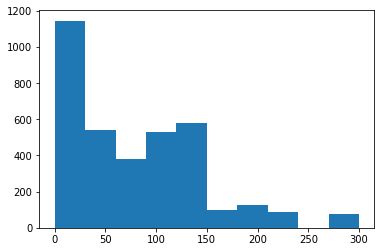

In [91]:
plt.hist(df['primary_income_mid'])

In [92]:
pd.crosstab(df['primary_income_mid'], df['fsv_any'])

fsv_any,0,1
primary_income_mid,,
0.0,657,172
5.0,37,11
15.0,128,35
25.0,81,23
35.0,90,37
45.0,135,42
55.0,178,59
65.0,100,32
75.0,182,63


In [93]:
pd.crosstab(df['primary_income_missing'], df['fsv_any'])

fsv_any,0,1
primary_income_missing,,
0.0,2299,820
1.0,376,67


In [94]:
pd.crosstab(df['primary_income_mid'], df['ins_client_flag_y'])

ins_client_flag_y,0,1
primary_income_mid,,
0.0,622,207
5.0,34,14
15.0,112,51
25.0,70,34
35.0,85,42
45.0,112,65
55.0,160,77
65.0,90,42
75.0,162,83


In [95]:
pd.crosstab(df['primary_income_missing'], df['ins_client_flag_y'])

ins_client_flag_y,0,1
primary_income_missing,,
0.0,2207,912
1.0,345,98


In [96]:
pd.crosstab(df['primary_income_mid'], df['trv_globalware_flag_y'])

trv_globalware_flag_y,0,1
primary_income_mid,,
0.0,696,133
5.0,37,11
15.0,146,17
25.0,94,10
35.0,108,19
45.0,155,22
55.0,202,35
65.0,104,28
75.0,200,45


In [97]:
pd.crosstab(df['primary_income_missing'], df['trv_globalware_flag_y'])

trv_globalware_flag_y,0,1
primary_income_missing,,
0.0,2539,580
1.0,391,52


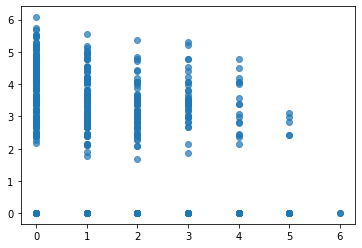

In [98]:
plt.scatter(df['children_num'], df['cost_2019_per_member_log'], alpha = 0.7)

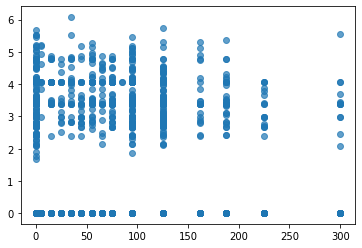

In [99]:
plt.scatter(df['primary_income_mid'], df['cost_2019_per_member_log'], alpha = 0.7)

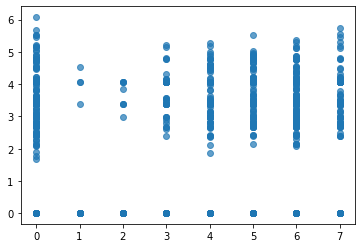

In [100]:
plt.scatter(df['primary_credit_ranges_num'], df['cost_2019_per_member_log'], alpha = 0.7)

In [101]:
df = df.assign(primary_age_35 = ((df['age_2018_primary'] <= 35)).astype('float64').astype('int'))
df = df.assign(primary_age_45 = ((df['age_2018_primary'] > 35) & (df['age_2018_primary'] <= 45)).astype('float64').astype('int'))
df = df.assign(primary_age_55 = ((df['age_2018_primary'] > 45) & (df['age_2018_primary'] <= 55)).astype('float64').astype('int'))
df = df.assign(primary_age_65 = ((df['age_2018_primary'] > 55) & (df['age_2018_primary'] <= 65)).astype('float64').astype('int'))
df = df.assign(primary_age_75 = ((df['age_2018_primary'] > 65) & (df['age_2018_primary'] <= 75)).astype('float64').astype('int'))
df = df.assign(primary_age_85 = ((df['age_2018_primary'] > 75) & (df['age_2018_primary'] <= 85)).astype('float64').astype('int'))
df = df.assign(primary_age_95 = ((df['age_2018_primary'] > 85) & (df['age_2018_primary'] <= 95)).astype('float64').astype('int'))
df = df.assign(primary_age_100 = ((df['age_2018_primary'] > 95)).astype('float64').astype('int'))

In [102]:
df = df.assign(children_num_4 = (df['children_num'] >= 4).astype('float64').astype('int'))

In [103]:
df = df.assign(primary_income30 = ((df['primary_income_mid'] <= 30) & 
                           (df['primary_income_missing'] == 0)).astype('float64').astype('int'))
df = df.assign(primary_income60 = ((df['primary_income_mid'] > 30) & 
                           (df['primary_income_mid'] <= 60)).astype('float64').astype('int'))
df = df.assign(primary_income80 = ((df['primary_income_mid'] > 60) & 
                           (df['primary_income_mid'] <= 80)).astype('float64').astype('int'))
df = df.assign(primary_income100 = ((df['primary_income_mid'] > 80) & 
                           (df['primary_income_mid'] <= 100)).astype('float64').astype('int'))
df = df.assign(primary_income150 = ((df['primary_income_mid'] > 100) & 
                           (df['primary_income_mid'] <= 150)).astype('float64').astype('int'))
df = df.assign(primary_income200 = ((df['primary_income_mid'] > 150) & 
                           (df['primary_income_mid'] <= 200)).astype('float64').astype('int'))
df = df.assign(primary_income300 = ((df['primary_income_mid'] > 200)).astype('float64').astype('int'))

In [104]:
df_temp = pd.get_dummies(df['primary_credit_ranges_num'].astype('int'), prefix = 'primary_credit_range')
df = pd.concat([df, df_temp], axis=1)

In [120]:
pd.crosstab(df['primary_credit_ranges_missing'], df['primary_credit_range_0'])

primary_credit_range_0,0,1
primary_credit_ranges_missing,,
0.0,2652,472
1.0,0,438


In [121]:
cond = ~((df['primary_credit_ranges_missing'] == 1))
df['primary_credit_range_0'] = df['primary_credit_range_0'].where(cond,0)

In [122]:
pd.crosstab(df['primary_credit_ranges_missing'], df['primary_credit_range_0'])

primary_credit_range_0,0,1
primary_credit_ranges_missing,,
0.0,2652,472
1.0,438,0


In [105]:
df.tail()

,Unnamed: 0,household_key,individual_key,fsv_any,new_product_any,aaa_before_club_dummy,fin_missing,children_num,children_missing,credit_ranges_num,...,primary_income200,primary_income300,primary_credit_range_0,primary_credit_range_1,primary_credit_range_2,primary_credit_range_3,primary_credit_range_4,primary_credit_range_5,primary_credit_range_6,primary_credit_range_7
3557,3557,100065197.0,1,0,1.0,0,1,0.0,1.0,0,...,0,0,1,0,0,0,0,0,0,0
3558,3558,100067809.0,2,0,0.0,0,0,1.0,0.0,7,...,0,1,0,0,0,0,0,0,0,1
3559,3559,100069201.0,1,0,1.0,0,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3560,3560,100071861.0,1,0,0.0,0,0,0.0,0.0,4,...,0,0,0,0,0,0,1,0,0,0
3561,3561,100079136.0,1,1,1.0,1,0,2.0,0.0,6,...,0,0,0,0,0,0,0,0,1,0


In [112]:
X = [
 'aaa_before_club_dummy',
 'fin_missing',
 'renew_not_notice',
 'billing_grouped_other',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_washington',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'email_status_unsubscribed',
    'email_status_other_grouped',
 'email_status_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'new_mover_flag_y',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'mail_responder_no',
 'responded_to_catalog_yes',
 'responded_to_catalog_yes_multiple_responses',
 'primary_education_completed_college',
 'primary_education_high_school',
 'primary_education_unknown',
 'primary_gender_grouped_male',
 'primary_gender_grouped_nan',
 'primary_language_grouped_unknown',
 'primary_mosaic_global_household_bourgeois_prosperity',
 'primary_mosaic_global_household_career_and_family',
 'primary_mosaic_global_household_hard_working_blue_collar',
 'primary_mosaic_global_household_post_industrial_survivors',
 'primary_mosaic_global_household_routine_service_workers',
    'primary_mosaic_global_household_other_grouped',
 'primary_mosaic_global_household_nan',
    'primary_occupation_group_grouped_blue_collar',
    'primary_occupation_group_grouped_management',
    'primary_occupation_group_grouped_office_administration',
    'primary_occupation_group_grouped_other',
    'primary_occupation_group_grouped_professional',
    'primary_occupation_group_grouped_sales',
 'primary_occupation_group_grouped_technical',
 'primary_race_hispanic',
    'primary_race_grouped_other_grouped',
 'children_num_std',
    'children_num_4',
 'primary_credit_range_0',
    'primary_credit_range_1',
    'primary_credit_range_2',
    'primary_credit_range_3',
    'primary_credit_range_4',
    'primary_credit_range_5',
    'primary_credit_range_7',
 'primary_income30',
    'primary_income60',
    'primary_income80',
    'primary_income150',
    'primary_income200',
    'primary_income300',
 'member_out_std',
    'primary_age_35',
    'primary_age_45',
    'primary_age_55',
    'primary_age_65',
    'primary_age_85',
    'primary_age_95',
    'primary_age_100',
 'join_club_year_std',
      'active_2018_std'
]

COLINEARITY CHECK

In [123]:
corr = np.corrcoef(df[X], rowvar = False)
w, v = np.linalg.eig(corr)
w = pd.Series(w)
[i for i in w]

[3.1407543452465596,
 2.9628094290370575,
 2.1865718372123752,
 1.9053016492924524,
 1.7027896863092722,
 0.1724941540815173,
 0.21933947220637476,
 0.25884320908772845,
 0.2806458273048147,
 1.5327284604438982,
 0.32163101273930367,
 1.484303830816751,
 0.36174045045343084,
 0.4001524275586839,
 0.4085922340003574,
 0.43093465084826277,
 0.41223149397181696,
 0.47686298417320666,
 0.48212210071849726,
 1.4219431868874373,
 0.5124392300687957,
 0.5452494732595983,
 0.5668245525867077,
 1.3785392139813615,
 0.6516424287993283,
 0.6583033971547223,
 1.3375621929801835,
 1.3273847566600743,
 0.7099037531015782,
 1.2823764756904978,
 1.269958350934044,
 0.7383031424177322,
 1.2424831501394795,
 1.2300030627540703,
 1.2239702742602747,
 0.763279664629862,
 0.7831920769138678,
 0.7991160781509403,
 1.2006459520564023,
 1.1860825742172274,
 1.178740591338687,
 1.1701404724642692,
 0.8301245399261715,
 1.1518151765600944,
 0.8462626540356746,
 1.1300042727818078,
 1.1201735003413222,
 1.109989

Potential multicolinearity in eigenvalue 5

In [124]:
v5 = pd.Series(v[:,5], index = df[X].columns)
for i in v5.index:
    print(i, v5[i])

aaa_before_club_dummy 0.006418070206485279
fin_missing -0.23909282098453374
renew_not_notice -0.00728384486163409
billing_grouped_other -0.013685547351606202
billing_grouped_upgrade_member -0.0020043775127553355
county_grouped_bristol -0.001530017406591905
county_grouped_kent 0.00711871102607347
county_grouped_newport 0.0005983652618195052
county_grouped_washington 0.011379226516723306
dwelling_type_small_or_large_multi-family_w/apt_number 0.02529257802156112
email_status_unsubscribed 0.008109878815550585
email_status_other_grouped 0.0061933754252558
email_status_nan 0.00554738223800471
member_phone_type_landline -0.004396406803637408
member_phone_type_voip -0.012033461563841693
member_phone_type_nan 0.007830010924157199
new_mover_flag_y 0.002485083409583413
plus_indicator_grouped_plus_membership -0.013532024939464435
plus_indicator_grouped_premier_membership -0.005477458489270542
mail_responder_no -0.00883729359735597
responded_to_catalog_yes -0.004783833369091201
responded_to_catalog

In [126]:
var_mc = [
    'fin_missing',
    'primary_credit_range_0',
    'primary_income30',
    'primary_income60',
    'primary_income80',
    'primary_income150',
    'primary_income200',
    'primary_income300'
       ]

In [127]:
lr = LinearRegression()

In [128]:
mat_mc = df[var_mc]
X_mc = mat_mc.iloc[:,1:]
Y_mc = mat_mc.iloc[:,0]

In [129]:
lr.fit(X_mc, Y_mc)
print(lr.score(X_mc, Y_mc))
y_pred_01 = lr.predict(X_mc)
print(np.sqrt(metrics.mean_squared_error(y_pred_01, Y_mc)))

0.29878477338027254
0.3136087660055913


Keep as is.

In [130]:
X01 = list(X)
X02 = list(X)
X03 = list(X)
X04 = list(X)
X01.append('cost_2018_std')
X02.append('cost_2018_per_member_std')
X03.append('cost_2018_log_std')
X04.append('cost_2018_per_member_log_std')

In [132]:
X_rs_01 = list(X)
X_rs_02 = list(X)
X_rs_03 = list(X)
X_rs_04 = list(X)
X_rs_01.append('cost_2018_std')
X_rs_02.append('calls_2018_std')
X_rs_03.extend(['cost_2018_std',
                'fsv_cmsi_flag_y',
                'fsv_credit_card_flag_y',
                'fsv_id_theft_flag_y',
                'fsv_rare_dummy',
                'ins_client_flag_y',
                'trv_globalware_flag_y'
               ])
X_rs_04.extend(['calls_2018_std',
                'fsv_cmsi_flag_y',
                'fsv_credit_card_flag_y',
                'fsv_id_theft_flag_y',
                'fsv_rare_dummy',
                'ins_client_flag_y',
                'trv_globalware_flag_y'
               ])

In [133]:
X_new_01 = list(X_rs_01)
X_new_01.extend(['motorcycle_indicator_y', 'motorcycle_indicator_nan',])
X_new_01

['aaa_before_club_dummy',
 'fin_missing',
 'renew_not_notice',
 'billing_grouped_other',
 'billing_grouped_upgrade_member',
 'county_grouped_bristol',
 'county_grouped_kent',
 'county_grouped_newport',
 'county_grouped_washington',
 'dwelling_type_small_or_large_multi-family_w/apt_number',
 'email_status_unsubscribed',
 'email_status_other_grouped',
 'email_status_nan',
 'member_phone_type_landline',
 'member_phone_type_voip',
 'member_phone_type_nan',
 'new_mover_flag_y',
 'plus_indicator_grouped_plus_membership',
 'plus_indicator_grouped_premier_membership',
 'mail_responder_no',
 'responded_to_catalog_yes',
 'responded_to_catalog_yes_multiple_responses',
 'primary_education_completed_college',
 'primary_education_high_school',
 'primary_education_unknown',
 'primary_gender_grouped_male',
 'primary_gender_grouped_nan',
 'primary_language_grouped_unknown',
 'primary_mosaic_global_household_bourgeois_prosperity',
 'primary_mosaic_global_household_career_and_family',
 'primary_mosaic_gl

SPLIT INTO TRAIN AND TEST SETS

In [131]:
df_train, df_test = train_test_split(df, random_state = 15)

CHOICE OF NEW PRODUCT

In [134]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [135]:
lgr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [138]:
X_train_new_01 = df_train[X_new_01]
X_test_new_01 = df_test[X_new_01]

Logit for fsv_any

In [139]:
Y_fsv_any_train = df_train['fsv_any']
Y_fsv_any_test = df_test['fsv_any']

In [140]:
lgr.fit(X_train_new_01, Y_fsv_any_train)
fsv_any_pred_01 = lgr.predict(X_test_new_01)
fsv_any_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_fsv_any_test, fsv_any_pred_01))
print(log_loss(Y_fsv_any_test, fsv_any_pr_01))
fsv_any_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_fsv_any_test, fsv_any_pred_01)
print(cfm)

0.17843866171003717
0.5449453600748226
[[646  23]
 [198  24]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log FSV any 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log FSV any 01.csv")
fsv_any_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
fsv_any_pr_df_01 = pd.DataFrame(fsv_any_pr_full_01, columns = ['fsv_any_pred_01'])
df = pd.concat([df, fsv_any_pr_df_01], axis = 1)

Logit for new products together

In [141]:
Y_new_any_train = df_train['new_product_any']
Y_new_any_test = df_test['new_product_any']

In [142]:
lgr.fit(X_train_new_01, Y_new_any_train)
new_any_pred_01 = lgr.predict(X_test_new_01)
new_any_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_new_any_test, new_any_pred_01))
print(log_loss(Y_new_any_test, new_any_pr_01))
new_any_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_new_any_test, new_any_pred_01)
print(cfm)

0.6138002059732235
0.6735756272576983
[[218 211]
 [164 298]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log new any 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log new any 01.csv")
new_any_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
new_any_pr_df_01 = pd.DataFrame(new_any_pr_full_01, columns = ['new_any_pred_01'])
df = pd.concat([df, new_any_pr_df_01], axis = 1)

Logit for FSV CMSI

In [143]:
Y_cmsi_train = df_train['fsv_cmsi_flag_y']
Y_cmsi_test = df_test['fsv_cmsi_flag_y']

In [144]:
lgr.fit(X_train_new_01, Y_cmsi_train)
cmsi_pred_01 = lgr.predict(X_test_new_01)
cmsi_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_cmsi_test, cmsi_pred_01))
print(log_loss(Y_cmsi_test, cmsi_pr_01))
cmsi_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_cmsi_test, cmsi_pred_01)
print(cfm)

0.0
0.25923886755360886
[[817   0]
 [ 74   0]]


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log CMSI 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log CMSI 01.csv")
cmsi_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
cmsi_pr_df_01 = pd.DataFrame(cmsi_pr_full_01, columns = ['cmsi_pred_01'])
df = pd.concat([df, cmsi_pr_df_01], axis = 1)

Logit for credit card

In [145]:
Y_credit_train = df_train['fsv_credit_card_flag_y']
Y_credit_test = df_test['fsv_credit_card_flag_y']

In [146]:
lgr.fit(X_train_new_01, Y_credit_train)
credit_pred_01 = lgr.predict(X_test_new_01)
credit_pr_01 = lgr.predict_proba(X_test_new_01)
print(f1_score(Y_credit_test, credit_pred_01))
print(log_loss(Y_credit_test, credit_pr_01))
credit_pr_full_01 = lgr.predict_proba(df[X_new_01])
cfm = confusion_matrix(Y_credit_test, credit_pred_01)
print(cfm)

0.043795620437956206
0.3948114289785354
[[757   6]
 [125   3]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log Credit 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log Credit 01.csv")
credit_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
credit_pr_df_01 = pd.DataFrame(credit_pr_full_01, columns = ['credit_pred_01'])
df = pd.concat([df, credit_pr_df_01], axis = 1)

ID theft

In [147]:
Y_id_train = df_train['fsv_id_theft_flag_y']
Y_id_test = df_test['fsv_id_theft_flag_y']

In [149]:
lgr.fit(X_train_new_01, Y_id_train)
id_pred_01 = lgr.predict(X_test_new_01)
id_pr_01 = lgr.predict_proba(X_test_new_01)
id_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
id_pr_df_01 = pd.DataFrame(id_pr_full_01, columns = ['id_pred_01'])
df = pd.concat([df, id_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_id_test, id_pred_01)
print(f1_score(Y_id_test, id_pred_01))
print(log_loss(Y_id_test, id_pr_01))
print(cfm)

0.0
0.2066006436608262
[[844   0]
 [ 47   0]]


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log ID 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log ID 01.csv")
id_pr_full_01 = lgr.predict_proba(df[X_new_01])

Logit for other FSV

In [150]:
Y_fsv_rare_train = df_train['fsv_rare_dummy']
Y_fsv_rare_test = df_test['fsv_rare_dummy']

In [151]:
lgr.fit(X_train_new_01, Y_fsv_rare_train)
fsv_rare_pred_01 = lgr.predict(X_test_new_01)
fsv_rare_pr_01 = lgr.predict_proba(X_test_new_01)
fsv_rare_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
fsv_rare_pr_df_01 = pd.DataFrame(fsv_rare_pr_full_01, columns = ['fsv_rare_pred_01'])
df = pd.concat([df, fsv_rare_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_fsv_rare_test, fsv_rare_pred_01)
print(f1_score(Y_fsv_rare_test, fsv_rare_pred_01))
print(log_loss(Y_fsv_rare_test, fsv_rare_pr_01))
print(cfm)

0.0
0.08472391066496052
[[878   0]
 [ 13   0]]


c:\users\jklim\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log FSV rare 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef FSV rare 01.csv")
fsv_rare_pr_full_01 = lgr.predict_proba(df[X_new_01])

Logit Insurance

In [152]:
Y_ins_train = df_train['ins_client_flag_y']
Y_ins_test = df_test['ins_client_flag_y']

In [153]:
lgr.fit(X_train_new_01, Y_ins_train)
ins_pred_01 = lgr.predict(X_test_new_01)
ins_pr_01 = lgr.predict_proba(X_test_new_01)
ins_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
ins_pr_df_01 = pd.DataFrame(ins_pr_full_01, columns = ['ins_pred_01'])
df = pd.concat([df, ins_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_ins_test, ins_pred_01)
print(f1_score(Y_ins_test, ins_pred_01))
print(log_loss(Y_ins_test, ins_pr_01))
print(cfm)

0.11221122112211221
0.5879382300027677
[[605  27]
 [242  17]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log INS 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef INS 01.csv")
ins_pr_full_01 = lgr.predict_proba(df[X_new_01])

Logit for travel

In [154]:
Y_trv_train = df_train['trv_globalware_flag_y']
Y_trv_test = df_test['trv_globalware_flag_y']

In [155]:
lgr.fit(X_train_new_01, Y_trv_train)
trv_pred_01 = lgr.predict(X_test_new_01)
trv_pr_01 = lgr.predict_proba(X_test_new_01)
trv_pr_full_01 = lgr.predict_proba(df[X_new_01])[:,1]
trv_pr_df_01 = pd.DataFrame(trv_pr_full_01, columns = ['trv_pred_01'])
df = pd.concat([df, trv_pr_df_01], axis = 1)
cfm = confusion_matrix(Y_trv_test, trv_pred_01)
print(f1_score(Y_trv_test, trv_pred_01))
print(log_loss(Y_trv_test, trv_pr_01))
print(cfm)

0.024242424242424242
0.4618527935521642
[[728   6]
 [155   2]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log TRV 01'])
coef_labels = pd.DataFrame(X_train_new_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef TRV 01.csv")
trv_pr_full_01 = lgr.predict_proba(df[X_new_01])

Logit for probability of roadside usage

In [157]:
X_train_rs_01 = df_train[X_rs_01]
X_test_rs_01 = df_test[X_rs_01]
X_train_rs_02 = df_train[X_rs_02]
X_test_rs_02 = df_test[X_rs_02]
X_train_rs_03 = df_train[X_rs_03]
X_test_rs_03 = df_test[X_rs_03]
X_train_rs_04 = df_train[X_rs_04]
X_test_rs_04 = df_test[X_rs_04]

In [158]:
Y_rs_train = df_train['call_2019_dummy']
Y_rs_test = df_test['call_2019_dummy']

In [159]:
lgr.fit(X_train_rs_01, Y_rs_train)
rs_pred_01 = lgr.predict(X_test_rs_01)
rs_pr_01 = lgr.predict_proba(X_test_rs_01)
print(f1_score(Y_rs_test, rs_pred_01))
print(log_loss(Y_rs_test, rs_pr_01))
rs_pr_full_01 = lgr.predict_proba(df[X_rs_01])
cfm = confusion_matrix(Y_rs_test, rs_pred_01)
print(cfm)

0.1978021978021978
0.5259318325328811
[[645  37]
 [182  27]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 01'])
coef_labels = pd.DataFrame(X_train_rs_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 01.csv")
rs_pr_full_01 = lgr.predict_proba(df[X_rs_01])[:,1]
rs_pr_df_01 = pd.DataFrame(rs_pr_full_01, columns = ['rs_pred_01'])
df = pd.concat([df, rs_pr_df_01], axis = 1)

In [160]:
lgr.fit(X_train_rs_02, Y_rs_train)
rs_pred_02 = lgr.predict(X_test_rs_02)
rs_pr_02 = lgr.predict_proba(X_test_rs_02)
print(f1_score(Y_rs_test, rs_pred_02))
print(log_loss(Y_rs_test, rs_pr_02))
rs_pr_full_02 = lgr.predict_proba(df[X_rs_02])
cfm = confusion_matrix(Y_rs_test, rs_pred_02)
print(cfm)

0.2158273381294964
0.5242706042630118
[[643  39]
 [179  30]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 02'])
coef_labels = pd.DataFrame(X_train_rs_02.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 02.csv")
rs_pr_full_02 = lgr.predict_proba(df[X_rs_02])[:,1]
rs_pr_df_02 = pd.DataFrame(rs_pr_full_02, columns = ['rs_pred_02'])
df = pd.concat([df, rs_pr_df_02], axis = 1)

In [161]:
lgr.fit(X_train_rs_03, Y_rs_train)
rs_pred_03 = lgr.predict(X_test_rs_03)
rs_pr_03 = lgr.predict_proba(X_test_rs_03)
print(f1_score(Y_rs_test, rs_pred_03))
print(log_loss(Y_rs_test, rs_pr_03))
rs_pr_full_03 = lgr.predict_proba(df[X_rs_03])
cfm = confusion_matrix(Y_rs_test, rs_pred_03)
print(cfm)

0.19708029197080296
0.526250957596067
[[644  38]
 [182  27]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 03'])
coef_labels = pd.DataFrame(X_train_rs_03.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 03.csv")
rs_pr_full_03 = lgr.predict_proba(df[X_rs_03])[:,1]
rs_pr_df_03 = pd.DataFrame(rs_pr_full_03, columns = ['rs_pred_03'])
df = pd.concat([df, rs_pr_df_03], axis = 1)

In [162]:
lgr.fit(X_train_rs_04, Y_rs_train)
rs_pred_04 = lgr.predict(X_test_rs_04)
rs_pr_04 = lgr.predict_proba(X_test_rs_04)
print(f1_score(Y_rs_test, rs_pred_04))
print(log_loss(Y_rs_test, rs_pr_04))
rs_pr_full_04 = lgr.predict_proba(df[X_rs_04])
cfm = confusion_matrix(Y_rs_test, rs_pred_04)
print(cfm)

0.2158273381294964
0.5244666061823673
[[643  39]
 [179  30]]


In [ ]:
coefs = pd.DataFrame(lgr.coef_.transpose(), columns = ['Log rs 04'])
coef_labels = pd.DataFrame(X_train_rs_04.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Log rs 04.csv")
rs_pr_full_04 = lgr.predict_proba(df[X_rs_04])[:,1]
rs_pr_df_04 = pd.DataFrame(rs_pr_full_04, columns = ['rs_pred_04'])
df = pd.concat([df, rs_pr_df_04], axis = 1)

LINEAR REGRESSION FOR COSTS

In [163]:
X_train_01 = df_train[df_train['call_2019_dummy'] == 1][X01]
X_test_01 = df_test[df_test['call_2019_dummy'] == 1][X01]
Y_train_01 = df_train[df_train['call_2019_dummy'] == 1].cost_2019
Y_test_01 = df_test[df_test['call_2019_dummy'] == 1].cost_2019
X_train_02 = df_train[df_train['call_2019_dummy'] == 1][X02]
X_test_02 = df_test[df_test['call_2019_dummy'] == 1][X02]
Y_train_02 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_per_member
Y_test_02 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_per_member
X_train_03 = df_train[df_train['call_2019_dummy'] == 1][X03]
X_test_03 = df_test[df_test['call_2019_dummy'] == 1][X03]
Y_train_03 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_log
Y_test_03 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_log
X_train_04 = df_train[df_train['call_2019_dummy'] == 1][X04]
X_test_04 = df_test[df_test['call_2019_dummy'] == 1][X04]
Y_train_04 = df_train[df_train['call_2019_dummy'] == 1].cost_2019_per_member_log
Y_test_04 = df_test[df_test['call_2019_dummy'] == 1].cost_2019_per_member_log

In [164]:
lr = LinearRegression()

In [165]:
lr.fit(X_train_01, Y_train_01)
print(lr.score(X_train_01, Y_train_01))
print(lr.score(X_test_01, Y_test_01))
y_pred_01 = lr.predict(X_test_01)
print(np.sqrt(metrics.mean_squared_error(y_pred_01, df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))

0.19503025440584298
-0.01663511150397534
49.373034955297285


In [ ]:
y_pred_full_01 = lr.predict(df[X01])
y_pred_df_01 = pd.DataFrame(y_pred_full_01, columns = ['costs_cond_01'])
df = pd.concat([df, y_pred_df_01], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 01'])
coef_labels = pd.DataFrame(X_train_01.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 01.csv")

In [166]:
lr.fit(X_train_02, Y_train_02)
print(lr.score(X_train_02, Y_train_02))
print(lr.score(X_test_02, Y_test_02))
y_pred_02 = lr.predict(X_test_02)
y_pred_02_transformed = y_pred_02 * df_test[df_test['call_2019_dummy'] == 1]['active_2019']
print(np.sqrt(metrics.mean_squared_error(y_pred_02_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))


0.2956760134806282
0.10345920153433964
70.64404056192627


In [ ]:
y_pred_full_02 = lr.predict(df[X02])
y_pred_full_02_transformed = y_pred_full_02 * df['active_2019']
y_pred_df_02 = y_pred_full_02_transformed.to_frame(name = "costs_cond_02")
df = pd.concat([df, y_pred_df_02], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 02'])
coef_labels = pd.DataFrame(X_train_02.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 02.csv")

In [167]:
lr.fit(X_train_03, Y_train_03)
print(lr.score(X_train_03, Y_train_03))
print(lr.score(X_test_03, Y_test_03))
y_pred_03 = lr.predict(X_test_03)
y_pred_03_transformed = np.exp(y_pred_03)
print(np.sqrt(metrics.mean_squared_error(y_pred_03_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))

0.2080824395981431
0.011549506841545987
49.14572240583813


In [ ]:
y_pred_full_03 = lr.predict(df[X03])
y_pred_full_03_transformed = np.exp(y_pred_full_03)
y_pred_df_03 = pd.DataFrame(y_pred_full_03_transformed, columns = ["costs_cond_03"])
df = pd.concat([df, y_pred_df_03], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 03'])
coef_labels = pd.DataFrame(X_train_03.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 03.csv")

In [168]:
lr.fit(X_train_04, Y_train_04)
print(lr.score(X_train_04, Y_train_04))
print(lr.score(X_test_04, Y_test_04))
y_pred_04 = lr.predict(X_test_04)
y_pred_04_transformed = np.exp(y_pred_04) * df_test[df_test['call_2019_dummy'] == 1]['active_2019']
print(np.sqrt(metrics.mean_squared_error(y_pred_04_transformed, 
                                         df_test[df_test['call_2019_dummy'] == 1]['cost_2019'])))

0.3378443236896218
0.19981964322763068
65.53071581523618


In [ ]:
y_pred_full_04 = lr.predict(df[X04])
y_pred_full_04_transformed = np.exp(y_pred_full_04) * df['active_2019']
y_pred_df_04 = y_pred_full_04_transformed.to_frame(name = "costs_cond_04")
df = pd.concat([df, y_pred_df_04], axis = 1)
coefs = pd.DataFrame(lr.coef_, columns = ['Lin 04'])
coef_labels = pd.DataFrame(X_train_04.columns, columns = ['Variable'])
coef_df = pd.concat([coef_labels, coefs], axis = 1)
export_csv = coef_df.to_csv("C:/Slava/08 Studies/00 Emeritus/04 - Capstone/Coef Lin 04.csv")

Conclusion:
- There is no clear improvement (or there is no improvement at all) for the choice of new products
- There is no improvement for probability of roadside usage
- There is a deterioration for linear regression for costs due to overfitting
No dichotomising of continuous variables for the final version.